# **Data Loading and Preprocessing**


# **1. Load the Datasets**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
data = pd.read_csv ('/content/onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# **2. Handle Missing Values**

In [ ]:
df_dummies = pd.get_dummies(data, drop_first = True)
df_dummies.isna().sum()

Age                                         0
Family size                                 0
latitude                                    0
longitude                                   0
Pin code                                    0
Gender_Male                                 0
Marital Status_Prefer not to say            0
Marital Status_Single                       0
Occupation_House wife                       0
Occupation_Self Employeed                   0
Occupation_Student                          0
Monthly Income_25001 to 50000               0
Monthly Income_Below Rs.10000               0
Monthly Income_More than 50000              0
Monthly Income_No Income                    0
Educational Qualifications_Ph.D             0
Educational Qualifications_Post Graduate    0
Educational Qualifications_School           0
Educational Qualifications_Uneducated       0
Output_Yes                                  0
Feedback_Positive                           0
Unnamed: 12_Yes                   

In [ ]:
num_features = ['Age', 'Monthly Income']
data[num_features] = data[num_features].fillna(data[num_features].median())

<ipython-input-4-32cccb8ef940>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[num_features] = data[num_features].fillna(data[num_features].median())


In [ ]:
cat_features = 'Occupation'
data = data.dropna(subset=[cat_features])

# **3. Encode Categorical Variables**

In [ ]:
cat_features = ['Gender', 'Marital Status', 'Occupation']
one_encoder = OneHotEncoder(sparse =False, handle_unknown = 'ignore')
encoded_data= pd.DataFrame(one_encoder.fit_transform(data[cat_features]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **4. Feature Selection**

In [ ]:
X = df_dummies.drop(['Occupation_House wife'], axis = 1)
Y = df_dummies['Occupation_House wife']
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

# **Part 2. Exploratory Data Analysis (EDA)**

In [ ]:
print(data.describe())

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


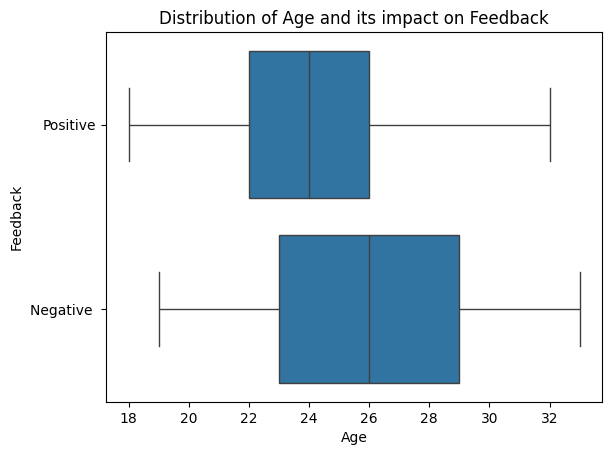

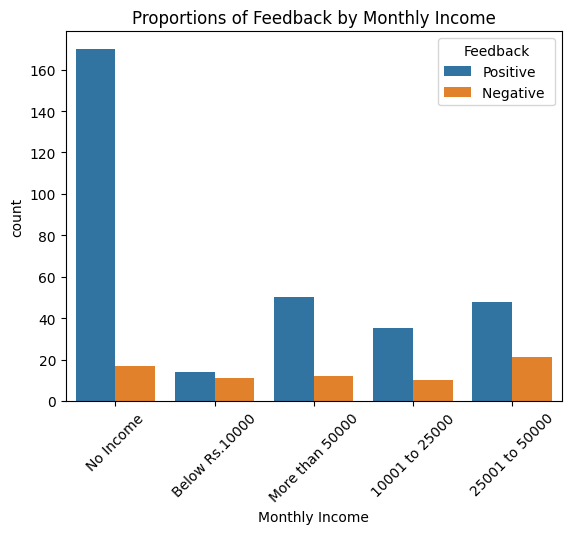

<ipython-input-9-9323c0298af7>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


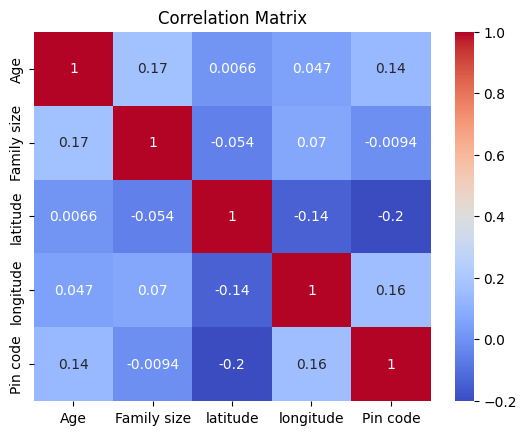

In [ ]:
# Distribution
feat_visualize = ['Age', 'Monthly Income']
sns.boxplot(
    x = "Age",
    y = "Feedback",
    data=data)
plt.title("Distribution of Age and its impact on Feedback")
plt.show()

# Proportions of Feedback
sns.countplot(x="Monthly Income", hue="Feedback", data=data)
plt.title("Proportions of Feedback by Monthly Income")
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **Part 3: Logistic Regression Model**

#**1. Build the Model**

In [ ]:
X = df_dummies.drop('Occupation_House wife', axis=1)
y = df_dummies['Occupation_House wife']

#**SPLIT THE DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**2. Model Evaluation**

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#**PART 4. DATA ANALYSIS AND VISUALIZATION**

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       0.00      0.00      0.00         3

    accuracy                           0.96        78
   macro avg       0.48      0.50      0.49        78
weighted avg       0.92      0.96      0.94        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


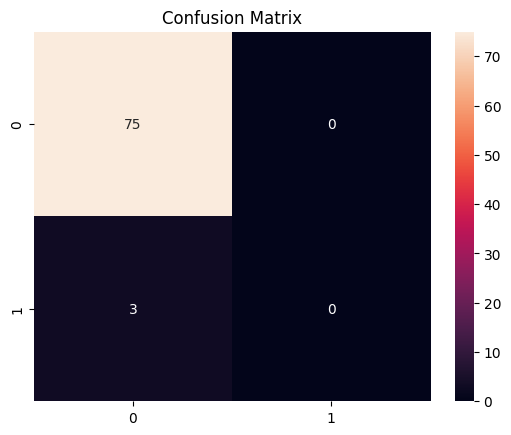

In [ ]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

#

#**1. Feature Importance**


#**2. PREDICTION INSIGHTS**

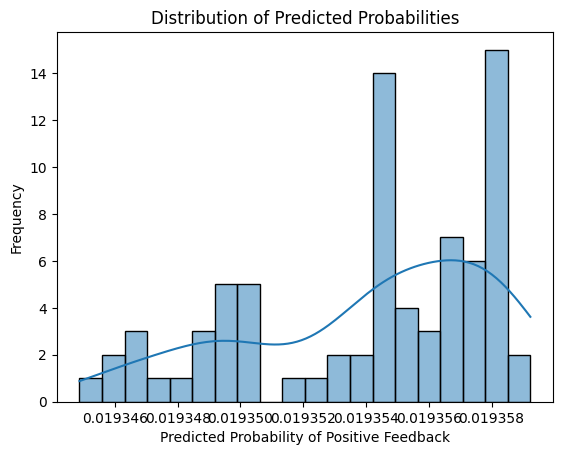

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.show()